# Imports

A supervised machine learning approach called k-Nearest Neighbors (KNN) can be applied to classification or regression problems. The approach does not make any assumptions about the underlying distributions of the data since KNN is non-parametric. As opposed to a parametric methodology like linear regression, which calls for us to identify a function that captures the connection between the dependent and independent variables, our method does not need this.

KNN has the benefit of being simple to comprehend. A query point (or test point) is categorized using the k labeled training points that are closest to it when utilized for classification.

Library import

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

# Load Iris Dataset
Dataset Details





In [ ]:
iris = datasets.load_iris()

df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['target'] = iris.target
#df = df.sample(frac = 1)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [ ]:
df.shape

(150, 5)

# Checkng if class is balanced

<Axes: ylabel='target'>

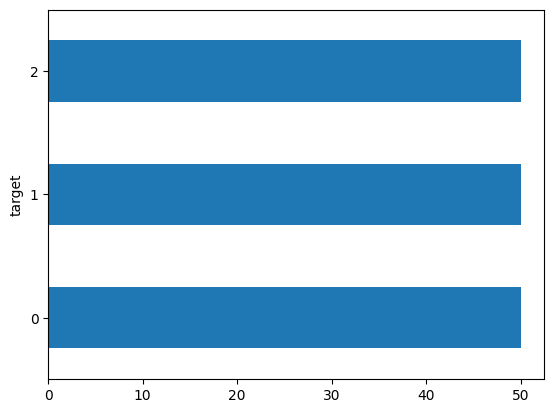

In [ ]:
df.groupby('target').size().plot(kind='barh')

In [ ]:
X = df.drop('target', axis=1)
y = df.target

In [ ]:
len(X)

150

In [ ]:
y

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: target, Length: 150, dtype: int64

In [ ]:
def dis(a,b,p=1):
  l = len(a)
  d=0
  for i in range(l):
    d += abs(a[i]-b[i]) **p
  d = d **(1/p)
  return d
dis(a=X.iloc[0], b=X.iloc[1], p=1)

0.6999999999999993

# Testing KNN for one input

In [ ]:
test_pt = [4.8, 2.7, 2.5, 0.7]
distances = []
for i in X.index:
  a = dis(test_pt,X.iloc[i])
  distances.append(a)
dists = pd.DataFrame(data=distances,index = X.index, columns = ['dist'])
dists.head()

,dist
0,2.7
1,2.0
2,2.3
3,2.1
4,2.7


In [ ]:
def knn_sort(k,dists):
  return dists.sort_values(by = 'dist')[:k]

In [ ]:
sorted_dists = knn_sort(5,dists)
print(sorted_dists)
count_set = {}
for i in sorted_dists.index:
  if y[i] not in count_set:
    count_set[y[i]] = 1
  else:
    count_set[y[i]] += 1

print(max(count_set))


    dist
98   1.4
57   1.5
93   1.7
24   1.8
30   1.8
1


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Split the data - 75% train, 25% test

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25,
                                                   random_state=1)

# Scale the X data

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
y_predict = []
for test_pt in X_test:
  distances = []
  for i in X_train:
    a = dis(test_pt,i)
    distances.append(a)
  dists = pd.DataFrame(data=distances,index=y_train.index, columns = ['dist'])
  sorted_dists = knn_sort(1,dists)
  #print(sorted_dists)
  count_set = {}
  for i in sorted_dists.index:
    if y_train[i] not in count_set:
      count_set[y_train[i]] = 1
    else:
      count_set[y_train[i]] += 1

  y_predict.append(max(count_set))
y = y_test.tolist()
accr = 0
for i in range(len(y)):
  if y[i] == y_predict[i]:
    accr += 1
print('Accuracy',accr/len(y))


Accuracy 0.9473684210526315


In [ ]:
def KNN(X_train, X_test, y_train, y_test, k,p):
  y_predict = []
  for test_pt in X_test:
    distances = []
    for i in X_train:
      a = dis(test_pt,i,p)
      distances.append(a)
    dists = pd.DataFrame(data=distances,index=y_train.index, columns = ['dist'])
    sorted_dists = knn_sort(k,dists)
    #print(sorted_dists)
    count_set = {}
    for i in sorted_dists.index:
      if y_train[i] not in count_set:
        count_set[y_train[i]] = 1
      else:
        count_set[y_train[i]] += 1

    y_predict.append(max(count_set))
  y = y_test.tolist()
  accr = 0
  for i in range(len(y)):
    if y[i] == y_predict[i]:
      accr += 1
  return accr/len(y)
  #print('Accuracy',accr/len(y))

In [ ]:
KNN(X_train, X_test, y_train, y_test, 3,1)

0.9736842105263158

0.9736842105263158


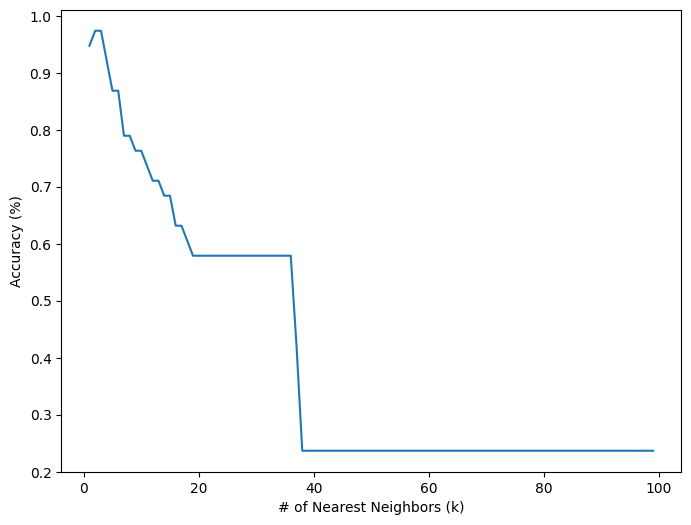

In [ ]:
accuracies = []

for i in range(1,100):
  accuracies.append(KNN(X_train, X_test, y_train, y_test, i,1))
print(max(accuracies))
fig, ax = plt.subplots(figsize=(8,6))
ax.plot(range(1,100), accuracies)
ax.set_xlabel('# of Nearest Neighbors (k)')
ax.set_ylabel('Accuracy (%)');

1.0


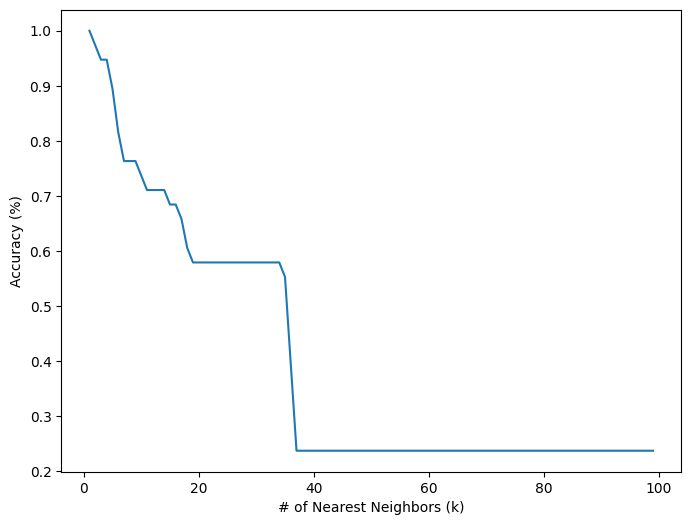

In [ ]:
accuracies = []

for i in range(1,100):
  accuracies.append(KNN(X_train, X_test, y_train, y_test, i,2))

print(max(accuracies))
fig, ax = plt.subplots(figsize=(8,6))
ax.plot(range(1,100), accuracies)
ax.set_xlabel('# of Nearest Neighbors (k)')
ax.set_ylabel('Accuracy (%)');